In [19]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [21]:
#Данные за 25.03 BT-20 AUI-87 MTT-Assay & AUI-97
data=pd.read_excel('D:/AnnaB/AUI-97/All_2_AUI-97_24h.xlsx',index_col=None)

X = data.loc[8:23,"k":"c_500"]
#Y = data.loc[0:23,"time"]
X.head(35)

,k,c_3,c_4,c_5,c_10,c_25,c_50,c_100,c_200,c_300,c_400,c_500
8,102.283105,97.518364,98.312488,94.183045,103.077229,94.977169,106.412547,95.930117,61.941632,92.277149,146.595196,95.930117
9,101.488982,101.806631,99.106611,73.377010,93.388922,91.324201,69.088743,92.753623,65.753425,100.377209,77.665277,94.500695
10,93.388922,100.377209,102.918404,93.547747,93.865396,98.630137,61.941632,82.112368,63.053405,92.912448,81.794719,100.218384
11,101.488982,80.841771,97.041890,92.277149,57.335716,94.977169,95.135994,93.230097,74.012309,92.912448,73.853484,84.653564
12,105.141950,79.888823,94.341870,73.218185,81.477070,92.118324,63.847528,92.435974,60.829859,93.388922,85.130038,105.300774
13,98.788962,103.077229,81.635894,90.371253,96.883065,91.165376,69.882867,80.682946,82.747667,95.612468,83.382966,105.936073
14,99.424260,94.341870,96.724241,94.977169,104.983125,103.712527,75.759381,92.753623,99.900735,91.641850,91.324201,104.665475
15,97.994838,89.418305,89.735954,98.788962,96.088942,98.471312,97.359539,101.806631,79.412349,108.159619,92.912448,107.683145
16,95.927012,112.349299,110.263930,110.003258,120.169436,119.126751,123.818833,113.652656,123.818833,114.434669,112.609971,128.250244
17,91.495601,109.481916,107.396546,104.789834,107.917889,115.998697,118.084066,131.638970,119.387423,112.088628,108.960573,118.605409


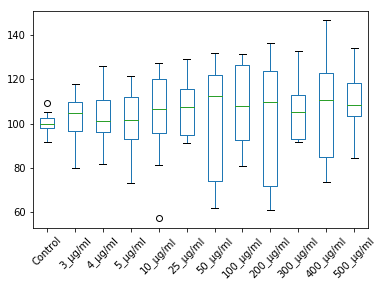

In [22]:
X.columns=['Control','3_μg/ml','4_μg/ml','5_μg/ml','10_μg/ml','25_μg/ml','50_μg/ml','100_μg/ml','200_μg/ml','300_μg/ml','400_μg/ml','500_μg/ml']
X.boxplot(column=['Control','3_μg/ml','4_μg/ml','5_μg/ml','10_μg/ml','25_μg/ml','50_μg/ml','100_μg/ml','200_μg/ml','300_μg/ml','400_μg/ml','500_μg/ml'], grid=False, rot=45)

In [23]:
f, p = stats.f_oneway(X['Control'], X['3_μg/ml'], X['4_μg/ml'], X['5_μg/ml'],X['10_μg/ml'],X['25_μg/ml'],X['50_μg/ml'],X['100_μg/ml'],X['200_μg/ml'],X['300_μg/ml'],X['400_μg/ml'],X['500_μg/ml'])
print(f,p)
#f1, p1 = stats.f_oneway(X['100_μg/ml'],X['200_μg/ml'],X['300_μg/ml'],X['400_μg/ml'],X['500_μg/ml'])
#print(f1,p1)
#['Control','3_μg/ml','4_μg/ml','5_μg/ml','10_μg/ml','25_μg/ml','50_μg/ml','100_μg/ml','200_μg/ml','300_μg/ml','400_μg/ml','500_μg/ml']

0.5671151775961772 0.853717373348339


In [24]:
d_melt = pd.melt(X.reset_index(), id_vars=['index'], value_vars=['Control','3_μg/ml','4_μg/ml','5_μg/ml','10_μg/ml','25_μg/ml','50_μg/ml','100_μg/ml','200_μg/ml','300_μg/ml','400_μg/ml','500_μg/ml'])
# replace column names
d_melt.columns = ['index', 'Concentration', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(Concentration)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Concentration),1892.861334,11.0,0.567115,0.853717
Residual,54616.938120,180.0,NaN,NaN


In [14]:
anova_table.to_excel(r'D:/AnnaB/AUI-97/Results_of_Analisis/Anova_AUI-97_24h_Conc(3-500μg_ml)!!!!.xlsx', index = False)

In [25]:
import pandas as pd
import seaborn as sns

                       sum_sq     df         F    PR(>F)
C(Conc)           5797.619669   11.0  2.369938  0.008294
C(time)            242.543820    1.0  1.090612  0.297291
C(Conc):C(time)   3717.781711   11.0  1.519747  0.124125
Residual         58711.604538  264.0       NaN       NaN


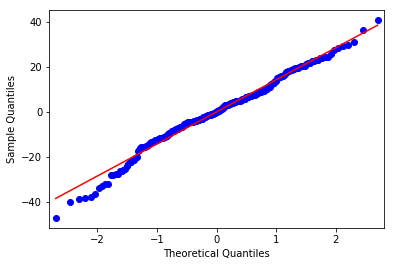

In [26]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

data = d=pd.read_excel('D:/AnnaB/AUI-97/All_2_AUI-97_24h.xlsx',index_col=None)
d_melt = pd.melt(d, id_vars=['time'], value_vars=['k', 'c_3', 'c_4', 'c_5', 'c_10', 'c_25', 'c_50', 'c_100', 'c_200', 'c_300', 'c_400', 'c_500'])
d_melt.columns = ['time', 'Conc', 'value']
d_melt.head()

# ANOVA
formula = 'value~C(Conc)+C(time)+C(Conc):C(time)'
model = ols(formula, d_melt).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)
aov_table.to_excel(r'D:/AnnaB/AUI-97/Results_of_Analisis/Anova_TwoFactor_AUI-97!!!.xlsx', index = False)

res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

    Time_of_Exposition_AUI-97 Concentration_of_AUI-97  Values_of_Survival
0                         48H                       k           98.600646
1                         48H                       k          103.121636
2                         48H                       k           97.524220
3                         48H                       k           96.447793
4                         48H                       k          101.399354
5                         48H                       k          106.781485
6                         48H                       k          100.538213
7                         48H                       k           95.586652
8                         24H                       k          102.283105
9                         24H                       k          101.488982
10                        24H                       k           93.388922
11                        24H                       k          101.488982
12                        24H         

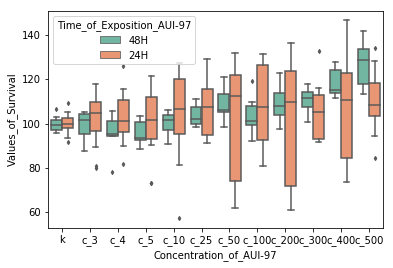

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib
d=pd.read_excel('D:/AnnaB/AUI-97/All_2_AUI-97_24h.xlsx',index_col=None)
d_melt = pd.melt(d, id_vars=['time'], value_vars=['k',  'c_3', 'c_4', 'c_5', 'c_10', 'c_25', 'c_50', 'c_100', 'c_200', 'c_300', 'c_400', 'c_500'])
d_melt.columns = ["Time_of_Exposition_AUI-97", "Concentration_of_AUI-97", "Values_of_Survival"]
d_melt.head()

print(d_melt)
sns.boxplot(x="Concentration_of_AUI-97", y="Values_of_Survival", hue="Time_of_Exposition_AUI-97", data=d_melt, palette="Set2",fliersize=3,whis=1) 





In [32]:
#PCA обработка

import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import array as arr
#data=pd.read_excel('D:/AnnaB/AUI-97/PCA_AUI97_Full.xlsx',index_col=None)
final=pd.read_excel('D:/AnnaB/AUI-97/PCA_AUI97_Full.xlsx',index_col=None)
#X = data.loc[0:23,"principal component 1":"principal component 2"]
#Y = data.loc[0:23,"time"]
#final = pd.concat([Y, X], axis= 1)
print(final)



    principal component 1  principal component 2
0                6.771976               4.376189
1                0.794144              -3.536249
2                1.037528              -1.999049
3                0.216213              -0.936085
4               -0.792827              -1.888124
5               -1.618642              -0.108770
6               -6.408393               4.092088
7                1.334991              -1.353806
8                4.235555               2.043940
9               -3.587940              -1.018959
10               1.294996              -2.061872
11              -3.277602               2.390696
12              -1.534209               0.292965
13              -1.735125               0.099172
14              -2.658309               1.183244
15              -2.666450              -0.362945
16              -1.525934              -0.138167
17              -0.773479               1.515843
18               0.743167              -0.813466
19              -0.6

In [24]:
pca = PCA(0.90)
X_pca = pca.fit_transform(final)
pca.components_.shape




(3, 9)

In [25]:
pca.explained_variance_ratio_


array([0.72018888, 0.13842215, 0.06187482])

In [26]:
x = X
y = Y

x = StandardScaler().fit_transform(x)

In [27]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [28]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2'])
principalDf.to_excel(r'D:/AnnaB/AUI-97/PCA_3.xlsx', index = False)


In [33]:
yDf = pd.Series(['1','1','1','1','1','1','1','1','1','1','1','1','2','2','2','2','2','2','2','2','2','2','2','2'])
#yDf = pd.Series(['2','2','2','2','2','2','2','2','2','2','2','2'])

In [34]:
#finalDf = pd.concat([principalDf, yDf], axis= 1)
#finalDf.head(15)
finalDf = pd.concat([final, yDf], axis= 1)
finalDf.head(15)
#finalDf.to_excel(r'D:/AnnaB/AUI-97/PCA_Full3.xlsx', index = False)

,principal component 1,principal component 2,0
0,6.771976,4.376189,1
1,0.794144,-3.536249,1
2,1.037528,-1.999049,1
3,0.216213,-0.936085,1
4,-0.792827,-1.888124,1
5,-1.618642,-0.108770,1
6,-6.408393,4.092088,1
7,1.334991,-1.353806,1
8,4.235555,2.043940,1
9,-3.587940,-1.018959,1


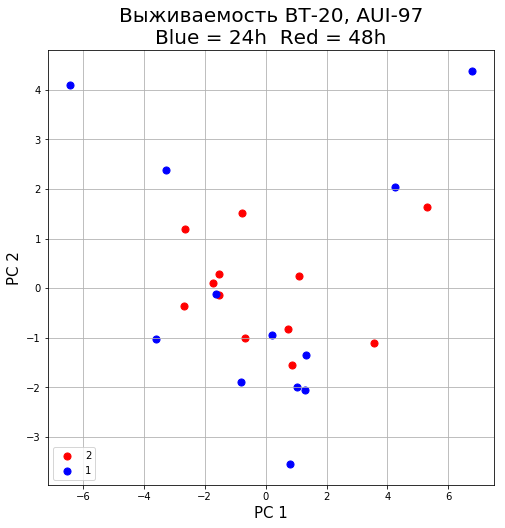

In [35]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Выживаемость BT-20, AUI-97' "\n" 'Blue = 24h  Red = 48h', fontsize = 20)


targets = ['2', '1']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = yDf == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)



ax.grid()

In [92]:
#Предобработка 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [100]:
data=pd.read_excel('D:/AnnaB/AUI-97/MTT BT-20_AUI-97_24h_25.03.xls',index_col=None)
X = data.loc[0:7,"k":'C_500']

    
print(X)

       k    C_3    C_4    C_5   C_10   C_25   C_50  C_100  C_200  C_300  \
0  0.368  0.431  0.423  0.422  0.461  0.457  0.475  0.436  0.475  0.439   
1  0.351  0.420  0.412  0.402  0.414  0.445  0.453  0.505  0.458  0.430   
2  0.380  0.410  0.483  0.439  0.420  0.432  0.460  0.474  0.476  0.393   
3  0.374  0.418  0.427  0.441  0.430  0.496  0.506  0.487  0.464  0.446   
4  0.385  0.410  0.443  0.422  0.476  0.443  0.465  0.494  0.495  0.431   
5  0.394  0.453  0.444  0.426  0.478  0.488  0.490  0.487  0.501  0.441   
6  0.419  0.435  0.423  0.466  0.488  0.427  0.460  0.485  0.523  0.418   
7  0.398  0.425  0.352  0.466  0.461  0.428  0.500  0.480  0.475  0.509   

   C_400  C_500  
0  0.432  0.492  
1  0.418  0.455  
2  0.481  0.420  
3  0.468  0.440  
4  0.449  0.471  
5  0.469  0.454  
6  0.489  0.439  
7  0.479  0.515  


In [94]:
def sr(lst):
    return sum(lst)/len(lst)

#lst=X.loc[:,] 
med=0.383625
print(med)

0.383625
